### **Feature Selection**

In [1]:
# Dependencies

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns
import os
import random
from scipy import stats
import warnings

from sklearn.feature_selection import SelectKBest, chi2, RFE, RFECV
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge
from sklearn.decomposition import PCA
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS

warnings.filterwarnings('ignore')
print('done importing')

done importing


In [2]:
df= pd.read_csv("../Resources/diabetes_2021_health_indicators_BRFSS2021.csv")
df

,Diabetes,Pre-Diabetic,Afford Costs,Physical Health,Mental Health,Exercise 30 Days,Heart Attack,Heart Disease,Stroke,Lung Disease,...,Gender,Age,Overweight/Obese,Education,Income,Smoker,Binge Drinker,Heavy Drinker,Fruit>1/Day,Veggies>1/Day
0,0,0,0,0,0,0,0,0,0,1,...,1,6,0,2,3,3,0,0,1,1
1,1,0,0,1,1,0,0,1,0,0,...,1,6,1,2,2,4,0,0,1,0
2,1,0,0,1,0,1,0,0,0,0,...,1,5,1,2,5,4,1,0,1,1
3,0,0,0,1,1,0,0,0,0,1,...,0,6,0,3,4,3,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,1,6,1,2,5,3,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242886,1,0,0,1,1,1,0,0,0,0,...,0,6,0,1,2,4,1,0,1,1
242887,0,0,1,1,0,1,0,0,0,1,...,1,2,0,2,3,3,0,0,1,1
242888,0,0,0,1,1,1,0,0,0,0,...,0,4,1,4,6,4,0,0,1,1
242889,0,0,0,1,1,1,0,0,0,0,...,0,6,0,2,4,4,0,0,1,1


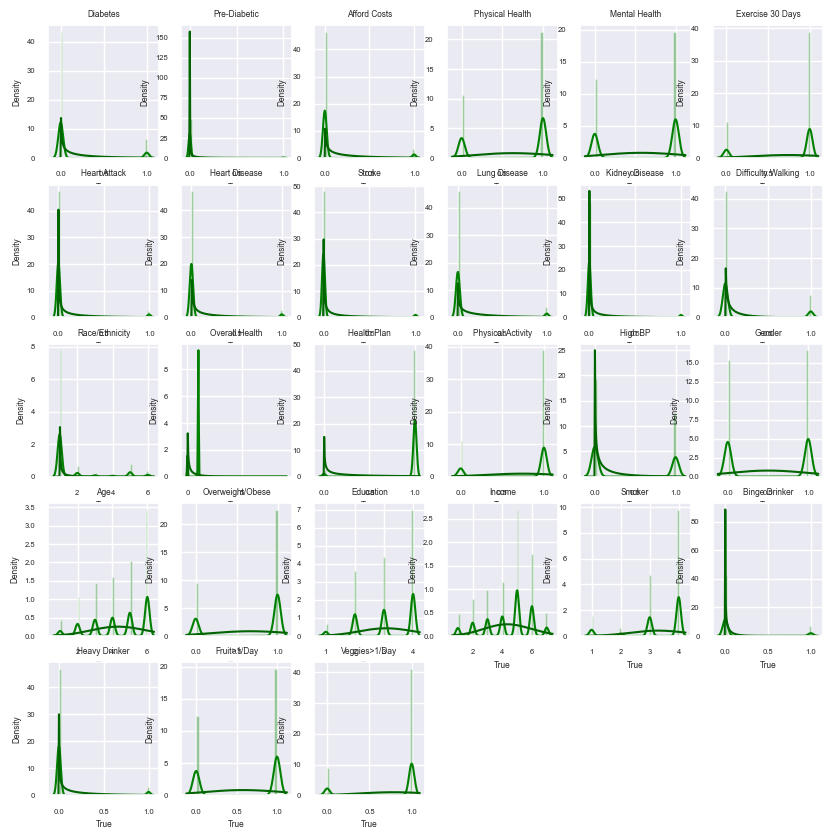

In [3]:
distplot_df=df.loc[:,['Diabetes',
                    'Pre-Diabetic',
                    'Afford Costs',
                    'Physical Health',
                    'Mental Health',
                    'Exercise 30 Days',
                    'Heart Attack',
                    'Heart Disease',
                    'Stroke',
                    'Lung Disease',
                    'Kidney Disease',
                    'Difficulty Walking',
                    'Race/Ethnicity',
                    'Overall Health',
                    'Health Plan',
                    'Physical Activity',
                    'High BP',
                    'Gender',
                    'Age',
                    'Overweight/Obese',
                    'Education',
                    'Income',
                    'Smoker',
                    'Binge Drinker',
                    'Heavy Drinker',
                    'Fruit>1/Day',
                    'Veggies>1/Day']]

sns.set(font_scale=0.5)
fig = plt.figure(figsize=(10, 10))
for i, column in enumerate(distplot_df.columns, 1):
    f=plt.subplot(5,6,i)
    sns.distplot(distplot_df[column], color="green",fit_kws={"color":"darkgreen"},fit=stats.gamma,kde=True,axlabel=True)
    plt.title(column)

### Univariate Selection
Statistical tests can be used to select those features that have the strongest relationship with the output variable. The scikit-learn library provides the SelectKBest class that can be used with a suite of different statistical tests to select a specific number of features. Using the chi-squared (chi²) statistical test for non-negative features to select 10 of the best features gives us a good sense of which features may provide the strongest predictive outcome.

In [4]:
# Create a copy of DataFrame
df_feature_uni = df.copy()

# Define X (independent variables/features),y (target)
y = (df_feature_uni['Diabetes'])
X = df_feature_uni.loc[:, df_feature_uni.columns != 'Diabetes']  # everything except "Diabetes"

bestfeatures = SelectKBest(score_func=chi2, k=5)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

                 Specs         Score
15             High BP  10463.757977
10  Difficulty Walking   9159.735357
9       Kidney Disease   6352.113415
17                 Age   5615.894585
6        Heart Disease   5361.052997
5         Heart Attack   5039.928357
7               Stroke   2481.297955
20              Income   2443.699124
8         Lung Disease   2215.038627
12      Overall Health   1869.959788


### Feature Importance 
You can get the feature importance of each feature of your dataset by using the feature importance property of the model. Feature importance gives you a score for each feature of your data, the higher the score more important or relevant the feature is to your output variable. Feature importance is an inbuilt class that comes with Tree-Based Classifiers, we will be using Extra Tree Classifier for extracting the top 10 features for the dataset.

[0.01314003 0.01884095 0.02612065 0.0363513  0.00703988 0.01743215
 0.01748312 0.01629559 0.02282518 0.02235835 0.0347007  0.07182755
 0.04567438 0.00839967 0.00940674 0.06836358 0.03165349 0.08337358
 0.02194832 0.09825238 0.14666327 0.08631327 0.01175088 0.00855697
 0.04109703 0.03413098]


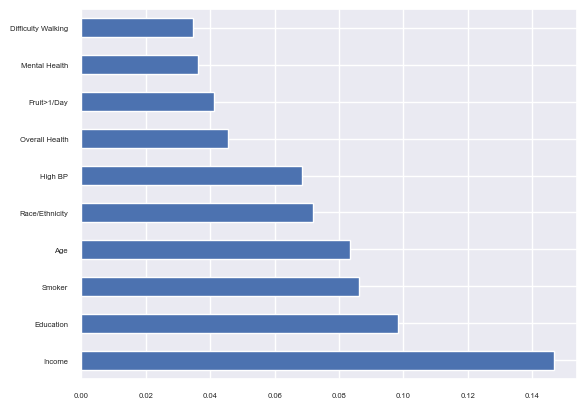

In [5]:
# Create a copy of DataFrame
df_feature_fi = df.copy()

X = df_feature_fi.iloc[:,1:27] #independent columns
y = df_feature_fi.iloc[:,0]    #target column i.e price range

model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

### Correlation Matrix with Heatmap 
Correlation states how the features are related to each other or the target variable. Correlation can be positive (an increase in one value of a feature increases the value of the target variable) or negative (an increase in one value of the feature decreases the value of the target variable).  Heatmap makes it easy to identify which features are most related to the target variable, we will plot a heatmap of correlated features using the Seaborn library.

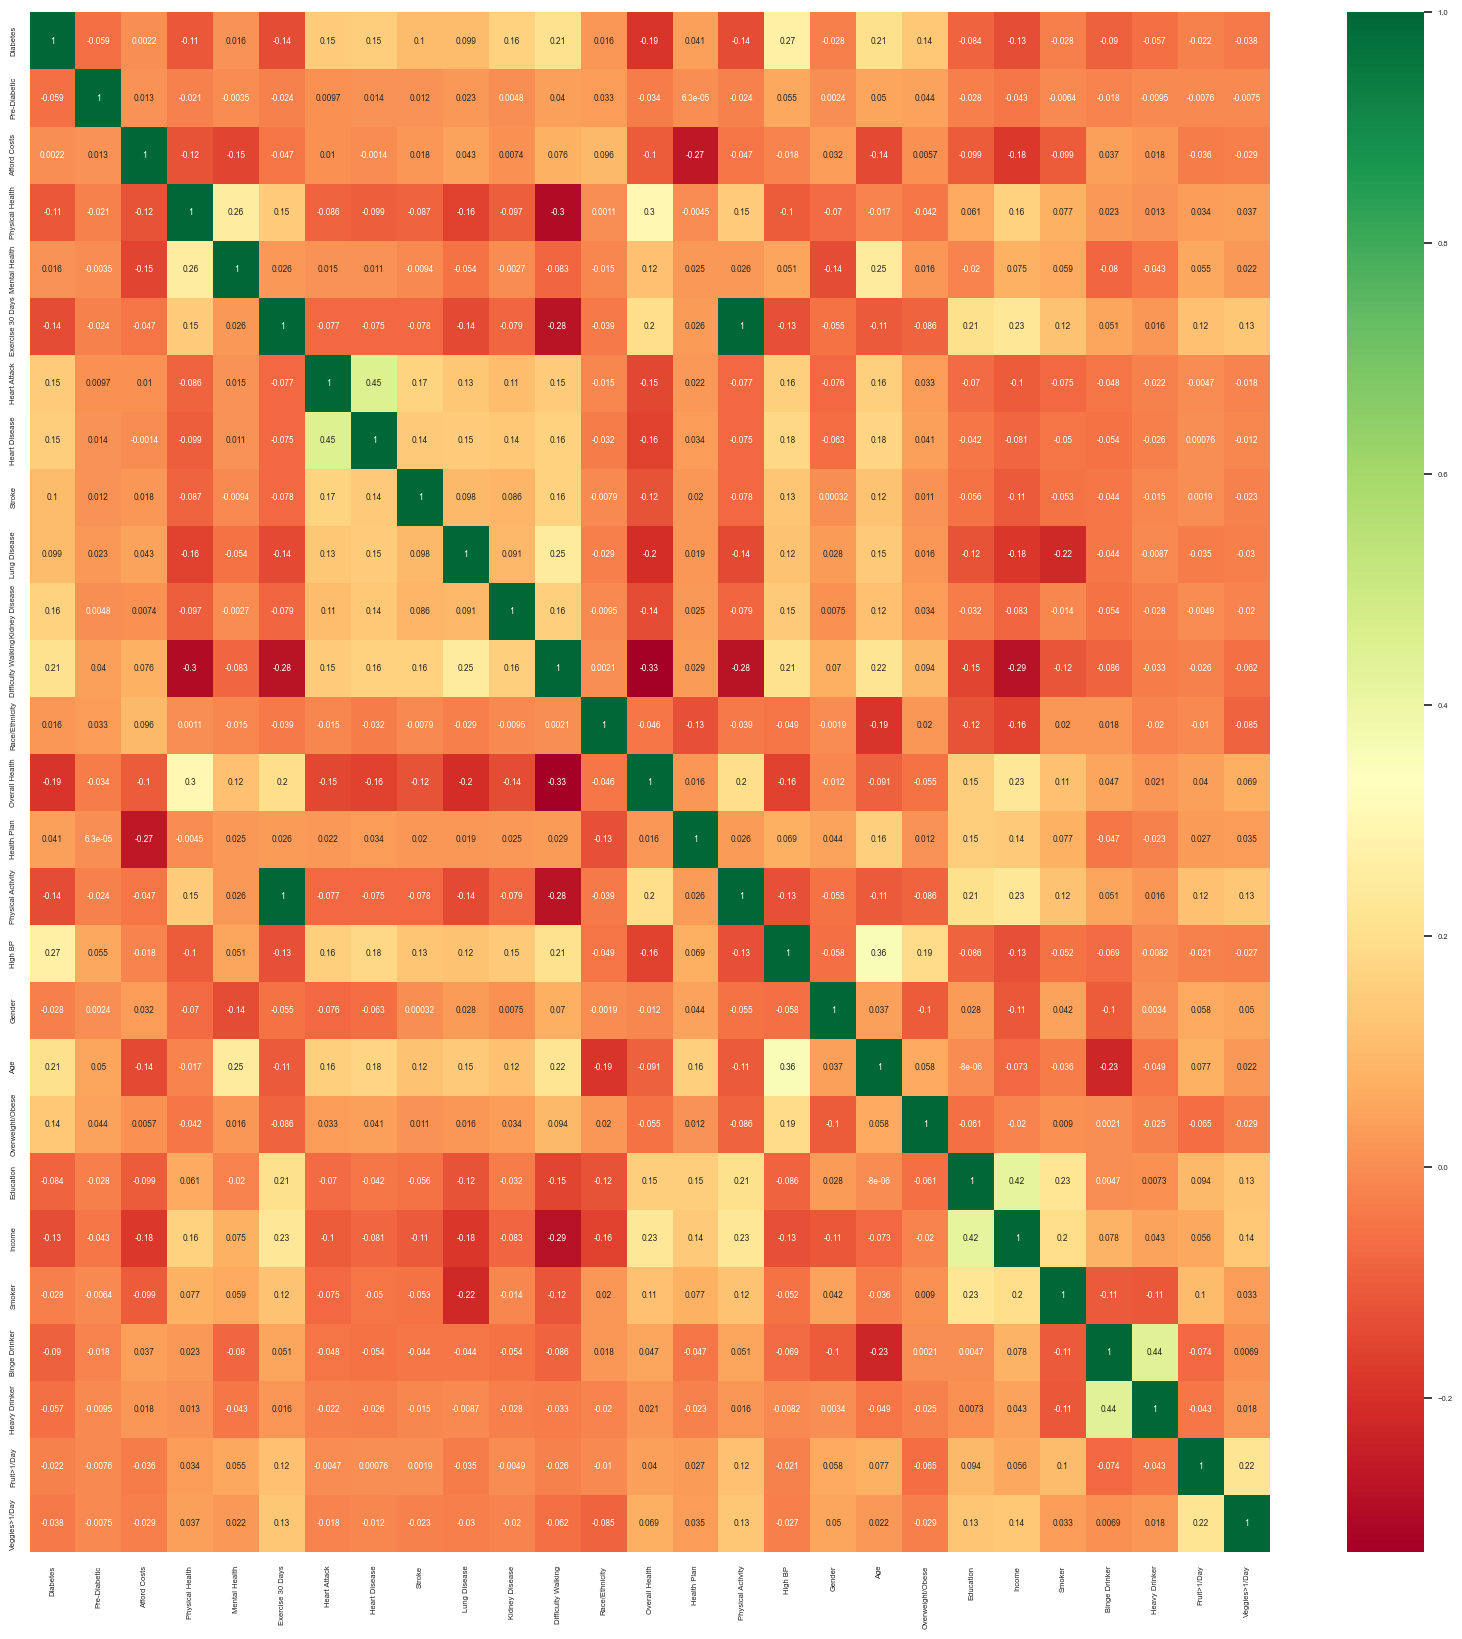

In [6]:
# Create a copy of DataFrame
df_feature_corr = df.copy()

X = df_feature_corr.iloc[:,1:27] #independent columns
y = df_feature_corr.iloc[:,0]    #target column i.e price range

#get correlations of each features in dataset
corrmat = df_feature_corr.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))

#plot heat map
g=sns.heatmap(df_feature_corr[top_corr_features].corr(),annot=True,cmap="RdYlGn")

### Recursive Feature Elimination 
RFE works by recursively removing attributes and building a model on those attributes that remain. It uses the model accuracy to identify which attributes (and combination of attributes) contribute the most to predicting the target attribute. You can learn more about the RFE class in the scikit-learn documentation. The example below uses RFE with the logistic regression algorithm to select the top 3 features. The choice of algorithm does not matter too much as long as it is skillful and consistent.  Recursive Feature Elimination fits a model that starts with all the input variables, then iteratively removes those with the weakest relationship with the output until the desired number of features is reached. It actually fits a model instead of just running statistical tests, unlike Univariate Testing. RFE is popular because it is easy to configure and use and because it is effective at selecting those features in a training dataset that are more or most relevant in predicting the target variable. 

In [7]:
# Create a copy of DataFrame
df_feature_rfe = df.copy()

columns = ['Diabetes','Pre-Diabetic','Afford Costs','Physical Health','Mental Health','Exercise 30 Days','Heart Attack','Heart Disease',
           'Stroke','Lung Disease','Kidney Disease','Difficulty Walking','Race/Ethnicity','Overall Health',
           'Health Plan','Physical Activity','High BP','Gender','Age','Overweight/Obese','Education',
           'Income', 'Smoker', 'Binge Drinker','Heavy Drinker','Fruit>1/Day','Veggies>1/Day']

array = df_feature_rfe[columns].values
X = array[:,1:27]
Y = array[:,0]

# feature extraction
model = LogisticRegression(solver='lbfgs')
rfe = RFE(estimator=model, n_features_to_select=3)
fit = rfe.fit(X, Y)
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

Num Features: 3
Selected Features: [ True False False False False False False False False False False False
  True False False  True False False False False False False False False
 False False]
Feature Ranking: [ 1 24 15 23 14  5 11 10 19  2  6 16  1 12  9  1 13  8  3 20 18 21  4  7
 17 22]


### Recursive Feature Elimination with Cross-Validation (RFECV) 
The CV in RFECV means Cross-Validation. It gives you a better understanding of what variables will be included in your model. The Cross-Validation part splits the data into different chunks and iteratively trains and validates models on each chunk separately. This simply means that each time you assess different models with certain variables included or eliminated, the algorithm also knows how accurate each model was from the model scenarios that are created and can determine which provided the best accuracy and concludes the best set of input variables to use.

Optimal numer of features: 26


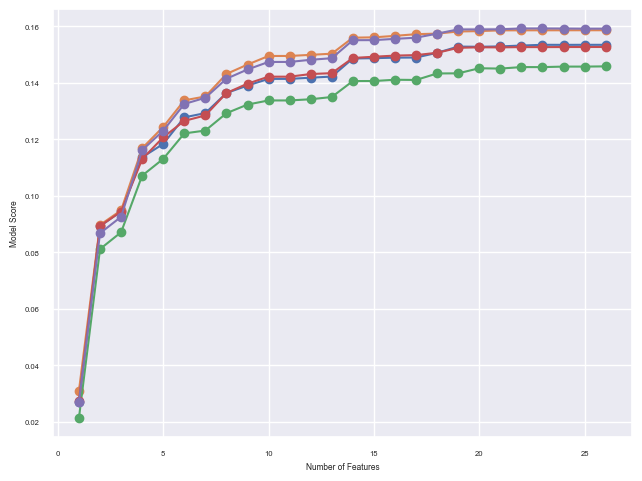

In [8]:
# Create a copy of DataFrame
df_feature_rfecv = df.copy()

X = df_feature_rfecv.drop(["Diabetes"], axis = 1)
y = df_feature_rfecv["Diabetes"]

regressor = LinearRegression()
feature_selector = RFECV(regressor)

fit = feature_selector.fit(X,y)

optimal_feature_count = feature_selector.n_features_
print(f"Optimal numer of features: {optimal_feature_count}")

X_new = X.loc[:, feature_selector.get_support()]

plt.plot(range(1, len(fit.grid_scores_) + 1), fit.grid_scores_, marker = "o")
plt.ylabel("Model Score")
plt.xlabel("Number of Features")
# plt.title(f"Feature Selection using RFE \n Optimal number of features is {optimal_feature_count} (at score of {round(max(fit.grid_scores_), 4)})")
plt.tight_layout() 
plt.show()

### Principal Component Analysis 
Principal Component Analysis (or PCA) uses linear algebra to transform the dataset into a compressed form. Generally, this is called a data reduction technique. A property of PCA is that you can choose the number of dimensions or principal components in the transformed result. In the example below, we use PCA and select 3 principal components. Learn more about the PCA class in scikit-learn by reviewing the PCA API. Dive deeper into the math behind PCA on the Principal Component Analysis Wikipedia article.

In [9]:
# Create a copy of DataFrame
df_feature_pca = df.copy()

columns_pca = ['Diabetes','Pre-Diabetic','Afford Costs','Physical Health','Mental Health','Exercise 30 Days','Heart Attack','Heart Disease',
           'Stroke','Lung Disease','Kidney Disease','Difficulty Walking','Race/Ethnicity','Overall Health',
           'Health Plan','Physical Activity','High BP','Gender','Age','Overweight/Obese','Education',
           'Income', 'Smoker', 'Binge Drinker','Heavy Drinker','Fruit>1/Day','Veggies>1/Day']

# load data
array = df_feature_pca[columns_pca].values
X = array[:,1:27]
Y = array[:,0]

# feature extraction
pca = PCA(n_components=2)
pca.fit(X)

# summarize components
print("Explained Variance: %s" % pca.explained_variance_ratio_)
print(pca.components_)

Explained Variance: [0.26349887 0.23881905]
[[ 0.0048271   0.0278166  -0.04887706 -0.01564062 -0.0708108   0.01519476
   0.01257262  0.01309531  0.03208946  0.01044325  0.06566697  0.32250547
  -0.06770419 -0.02038544 -0.0708108   0.0464909   0.02763297  0.10191831
   0.01221289 -0.29280896 -0.86437361 -0.15183539 -0.01600699 -0.00559976
  -0.02150949 -0.03709294]
 [-0.0028622   0.02267484  0.01000623 -0.06454406  0.02705991 -0.02044269
  -0.02414324 -0.01366679 -0.02547462 -0.01364771 -0.04764107  0.49202425
   0.02235503 -0.02282864  0.02705991 -0.10577295 -0.01146844 -0.85230856
  -0.01397491 -0.0111312   0.06327349  0.04228749  0.04429539  0.00569227
  -0.01951439 -0.01050239]]


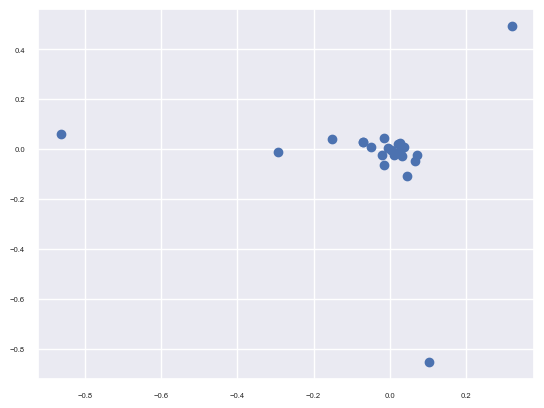

In [10]:
PCA1 = [0.00482923,  0.02778211, -0.04901178, -0.01552602, -0.0708873,   0.01525213,
   0.01263998,  0.01314366,  0.03217968,  0.01048822,  0.06586155,  0.32106812,
   0.07131759, -0.02032584, -0.0708873,   0.04678656,  0.0276418,   0.10407438,
   0.01225527, -0.29274783, -0.86430457, -0.15197246, -0.01611547, -0.0056128,
   0.02146707,  0.03705421]
PCA2 = [-0.00284667,  0.02274239,  0.00992576, -0.06456367,  0.02688558, -0.0204046,
  -0.02411345, -0.01363684, -0.02539832, -0.01362481, -0.0474952,   0.49294253,
  -0.02440908, -0.02288748,  0.02688558, -0.10565132, -0.01138218, -0.85194859,
  -0.01394382, -0.01195667,  0.06079242,  0.04186267,  0.04425098,  0.00567734,
   0.01957602,  0.01060293]

plt.scatter(x=PCA1, y=PCA2)

### Ridge Regression 
One of the most important things about ridge regression is that without wasting any information about predictions, it tries to determine variables with zero effects. Ridge regression is popular because it uses regularization for making predictions, and regularization is intended to resolve the problem of overfitting. Ridge regression can also help us in feature selection to find out the important features required for modelling purposes.  We can consider ridge regression as a way or method to estimate the coefficient of multiple regression models.  We mainly find the requirement of ridge regression where variables in data are highly correlated. We can also think of ridge regression as a possible solution to the imprecision of LSE(least square estimator) where the independent variables of any linear regression model are highly correlated. Features with negative coefficients do not contribute as much as those with positive coefficients. However, in a more complex scenario where many features are involved, this score will certainly assist in the final selection of features.

In [11]:
# Create a copy of DataFrame
df_feature_rm = df.copy()

# Add the values to an array
array = df_feature_rm.values

X = array[:,0:27]
Y = array[:,0]

ridge = Ridge(alpha=1.0)
ridge.fit(X,Y)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   random_state=None, solver='auto', tol=0.001)

# A helper method for pretty-printing the coefficients
def pretty_print_coefs(coefs, names = None, sort = False):
    if names == None:
        names = ["X%s" % x for x in range(len(coefs))]
    lst = zip(coefs, names)
    if sort:
        lst = sorted(lst,  key = lambda x:-np.abs(x[0]))
    return " + ".join("%s * %s" % (round(coef, 3), name)
                                   for coef, name in lst)

print ("Ridge model:", pretty_print_coefs(ridge.coef_))

Ridge model: 1.0 * X0 + -0.0 * X1 + -0.0 * X2 + -0.0 * X3 + -0.0 * X4 + -0.0 * X5 + 0.0 * X6 + 0.0 * X7 + 0.0 * X8 + -0.0 * X9 + 0.0 * X10 + 0.0 * X11 + 0.0 * X12 + -0.0 * X13 + 0.0 * X14 + -0.0 * X15 + 0.0 * X16 + -0.0 * X17 + 0.0 * X18 + 0.0 * X19 + -0.0 * X20 + -0.0 * X21 + 0.0 * X22 + -0.0 * X23 + -0.0 * X24 + -0.0 * X25 + -0.0 * X26
